##Installing the scikit-fuzzy package:

In [1]:
!pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in /usr/local/lib/python3.6/dist-packages (0.4.2)


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

##Defining Variables:

In [3]:
# INPUTS:
grade = ctrl.Antecedent(np.arange(0, 101, 10), 'Grade')
temp = ctrl.Antecedent(np.arange(0, 101, 10), 'Temp')

# OUTPUT:
N = ctrl.Consequent(np.arange(0, 101, 10), 'Purifiers_Needed')

## Membership Functons:

### - Input Variables:

In [4]:
grade['Low'] = fuzz.trapmf(x=grade.universe, abcd=[0,0,10,30])
grade['Medium'] = fuzz.trapmf(x=grade.universe, abcd=[20,40,60,90])
grade['High'] = fuzz.trapmf(x=grade.universe, abcd=[50,80,100,100])

In [5]:
temp['Low'] = fuzz.trapmf(x=temp.universe, abcd=[0,0,10,30])
temp['Medium'] = fuzz.trapmf(x=temp.universe, abcd=[20,40,60,90])
temp['High'] = fuzz.trapmf(x=temp.universe, abcd=[50,80,100,100])

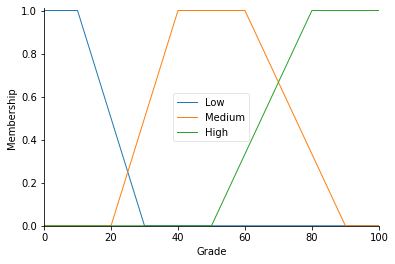

In [6]:
grade.view()

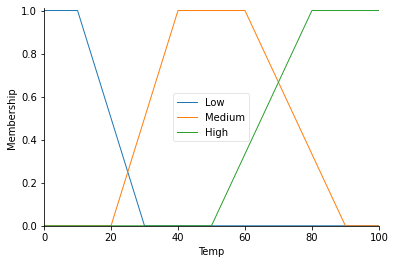

In [7]:
temp.view()

### - Output Variables:

In [8]:
N['Small'] = fuzz.trapmf(x=N.universe, abcd=[0,0,20,50])
N['Medium'] = fuzz.trapmf(x=N.universe, abcd=[20,40,60,80])
N['Large'] = fuzz.trapmf(x=N.universe, abcd=[50,80,100,100])

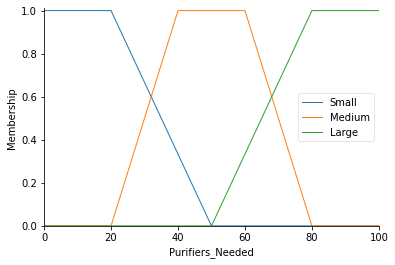

In [9]:
N.view()

##Rule Base:

In [10]:
rule1 = ctrl.Rule(grade['Low'] & temp['Low'], N['Large'])
rule2 = ctrl.Rule(grade['Medium'] & temp['Low'], N['Medium'])
rule3 = ctrl.Rule(grade['High'] & temp['Low'], N['Small'])
rule4 = ctrl.Rule(grade['Low'] & temp['Medium'], N['Large'])
rule5 = ctrl.Rule(grade['Medium'] & temp['Medium'], N['Large'])
rule6 = ctrl.Rule(grade['High'] & temp['Medium'], N['Medium'])
rule7 = ctrl.Rule(grade['Low'] & temp['High'], N['Large'])
rule8 = ctrl.Rule(grade['Medium'] & temp['High'], N['Medium'])
rule9 = ctrl.Rule(grade['High'] & temp['High'], N['Small'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faa0959b2b0>)

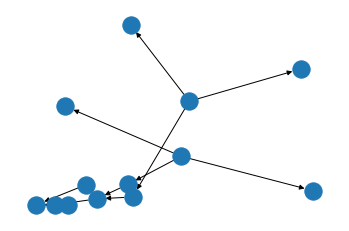

In [11]:
rule1.view()

##Controller System:

In [12]:
the_control_system = ctrl.ControlSystem([rule1, rule2, rule3,rule4, rule5, rule6, rule7, rule8, rule9])

In [13]:
amount_of_purifiers = ctrl.ControlSystemSimulation(control_system=the_control_system)

##Example:

In [14]:
amount_of_purifiers.input['Grade'] = 20.0
amount_of_purifiers.input['Temp'] = 8

In [15]:
amount_of_purifiers.compute()

In [16]:
print(int(amount_of_purifiers.output['Purifiers_Needed']))

78


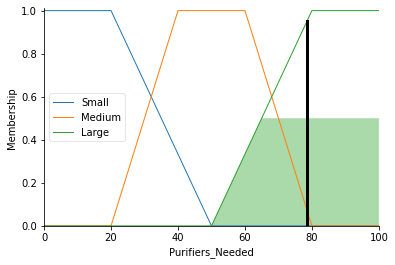

In [17]:
N.view(sim=amount_of_purifiers)